# Read DataSet

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import shutil
import pandas as pd
import glob
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!unzip /kaggle/input/dogs-vs-cats/train.zip
!unzip /kaggle/input/dogs-vs-cats/test1.zip

Archive:  /kaggle/input/dogs-vs-cats/train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/ca

# Shape and Count Each Class

In [4]:
# Count the number of train sample
train_files = glob.glob('/kaggle/working/train/*')
len_train = len(train_files)
len_train

25000

In [5]:
# another way to acheive count of train data
path , dirs , files = next(os.walk('/kaggle/working/train'))
len_train = len(files)
len_train

25000

In [6]:
dirs

[]

In [7]:
path

'/kaggle/working/train'

In [8]:
files

['cat.1561.jpg',
 'dog.12476.jpg',
 'cat.8353.jpg',
 'cat.8040.jpg',
 'dog.4563.jpg',
 'cat.9942.jpg',
 'cat.511.jpg',
 'dog.11167.jpg',
 'dog.5236.jpg',
 'dog.2354.jpg',
 'cat.6771.jpg',
 'dog.1992.jpg',
 'cat.123.jpg',
 'cat.6209.jpg',
 'cat.12281.jpg',
 'cat.6639.jpg',
 'dog.8718.jpg',
 'cat.10960.jpg',
 'cat.1834.jpg',
 'dog.1148.jpg',
 'cat.7272.jpg',
 'cat.264.jpg',
 'dog.5424.jpg',
 'cat.8627.jpg',
 'dog.1903.jpg',
 'cat.2739.jpg',
 'cat.10276.jpg',
 'cat.9314.jpg',
 'dog.11922.jpg',
 'cat.9703.jpg',
 'cat.1270.jpg',
 'cat.758.jpg',
 'dog.12218.jpg',
 'cat.4692.jpg',
 'cat.1448.jpg',
 'cat.1835.jpg',
 'dog.7891.jpg',
 'dog.8081.jpg',
 'cat.10992.jpg',
 'dog.804.jpg',
 'cat.2020.jpg',
 'dog.10656.jpg',
 'cat.697.jpg',
 'dog.1368.jpg',
 'dog.6567.jpg',
 'cat.3289.jpg',
 'dog.2944.jpg',
 'cat.11383.jpg',
 'dog.10873.jpg',
 'dog.10135.jpg',
 'dog.10651.jpg',
 'cat.6297.jpg',
 'dog.12034.jpg',
 'dog.2057.jpg',
 'cat.619.jpg',
 'cat.5123.jpg',
 'dog.3565.jpg',
 'dog.4746.jpg',
 'cat.2

In [9]:
# Count the number of test sample
test_files = glob.glob('/kaggle/working/test1/*')
len_test = len(test_files)
len_test

12500

In [10]:
# Count of each class in train data
data_train = {}

data_train['cat'] = glob.glob('/kaggle/working/train/cat*')
data_train['dog'] = glob.glob('/kaggle/working/train/dog*')

print(f"count of cat in train data :  {len(data_train['cat'])}")
print(f"count of dog in train data :  {len(data_train['dog'])}")

count of cat in train data :  12500
count of dog in train data :  12500


In [11]:
data_train

{'cat': ['/kaggle/working/train/cat.1561.jpg',
  '/kaggle/working/train/cat.8353.jpg',
  '/kaggle/working/train/cat.8040.jpg',
  '/kaggle/working/train/cat.9942.jpg',
  '/kaggle/working/train/cat.511.jpg',
  '/kaggle/working/train/cat.6771.jpg',
  '/kaggle/working/train/cat.123.jpg',
  '/kaggle/working/train/cat.6209.jpg',
  '/kaggle/working/train/cat.12281.jpg',
  '/kaggle/working/train/cat.6639.jpg',
  '/kaggle/working/train/cat.10960.jpg',
  '/kaggle/working/train/cat.1834.jpg',
  '/kaggle/working/train/cat.7272.jpg',
  '/kaggle/working/train/cat.264.jpg',
  '/kaggle/working/train/cat.8627.jpg',
  '/kaggle/working/train/cat.2739.jpg',
  '/kaggle/working/train/cat.10276.jpg',
  '/kaggle/working/train/cat.9314.jpg',
  '/kaggle/working/train/cat.9703.jpg',
  '/kaggle/working/train/cat.1270.jpg',
  '/kaggle/working/train/cat.758.jpg',
  '/kaggle/working/train/cat.4692.jpg',
  '/kaggle/working/train/cat.1448.jpg',
  '/kaggle/working/train/cat.1835.jpg',
  '/kaggle/working/train/cat.10992

In [12]:
# # Count of each class in test data
# data_test = {}

# data_test['cat'] = glob.glob('/kaggle/working/test1/cat*')
# data_test['dog'] = glob.glob('/kaggle/working/test1/dog*')

# print(f"count of cat in test data :  {len(data_test['cat'])}")
# print(f"count of dog in test data :  {len(data_test['dog'])}")

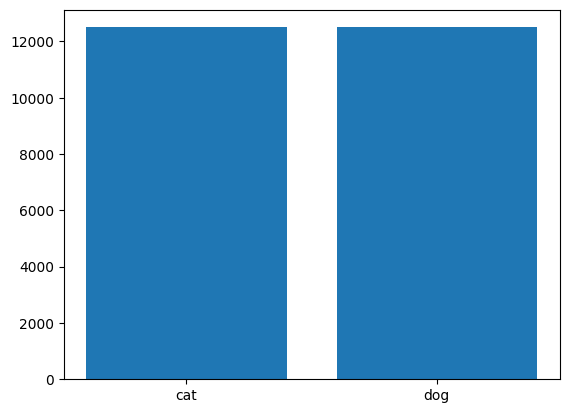

In [13]:
x = data_train.keys()
y = [len(count) for count in data_train.values()]

plt.bar(x,y);

data in each class are balanced

In [14]:
#Get the dimensions of each photo
def get_dims (img):
    image = cv2.imread(img)
    h, w, d = image.shape
    return h, w , d

In [15]:
df = pd.DataFrame(columns = ['Height',
                            'Width',
                            'Channels',
                            'Class'])
for img in files:
    h, w, d = get_dims(path+'/'+img)
    df.loc[len(df)] = [h , w , d, img.split('.')[0]]
    
df


Height  Width  Channels Class
0         374    500         3   cat
1         433    215         3   dog
2         374    500         3   cat
3         181    180         3   cat
4         320    500         3   dog
...       ...    ...       ...   ...
24995     500    415         3   cat
24996     375    499         3   dog
24997     398    349         3   cat
24998     157    124         3   cat
24999     149    150         3   cat

[25000 rows x 4 columns]

In [16]:
fig = px.scatter_3d(df, x='Height', y='Width', z='Channels', color='Class', symbol='Class',
                    labels={'Height':'Height', 'Width':'Width', 'Channels':'Channels'},
                    title='3D Scatter plot of Image Dimensions by Class')

fig.show()

# EDA(Exploratory Data Analysis)

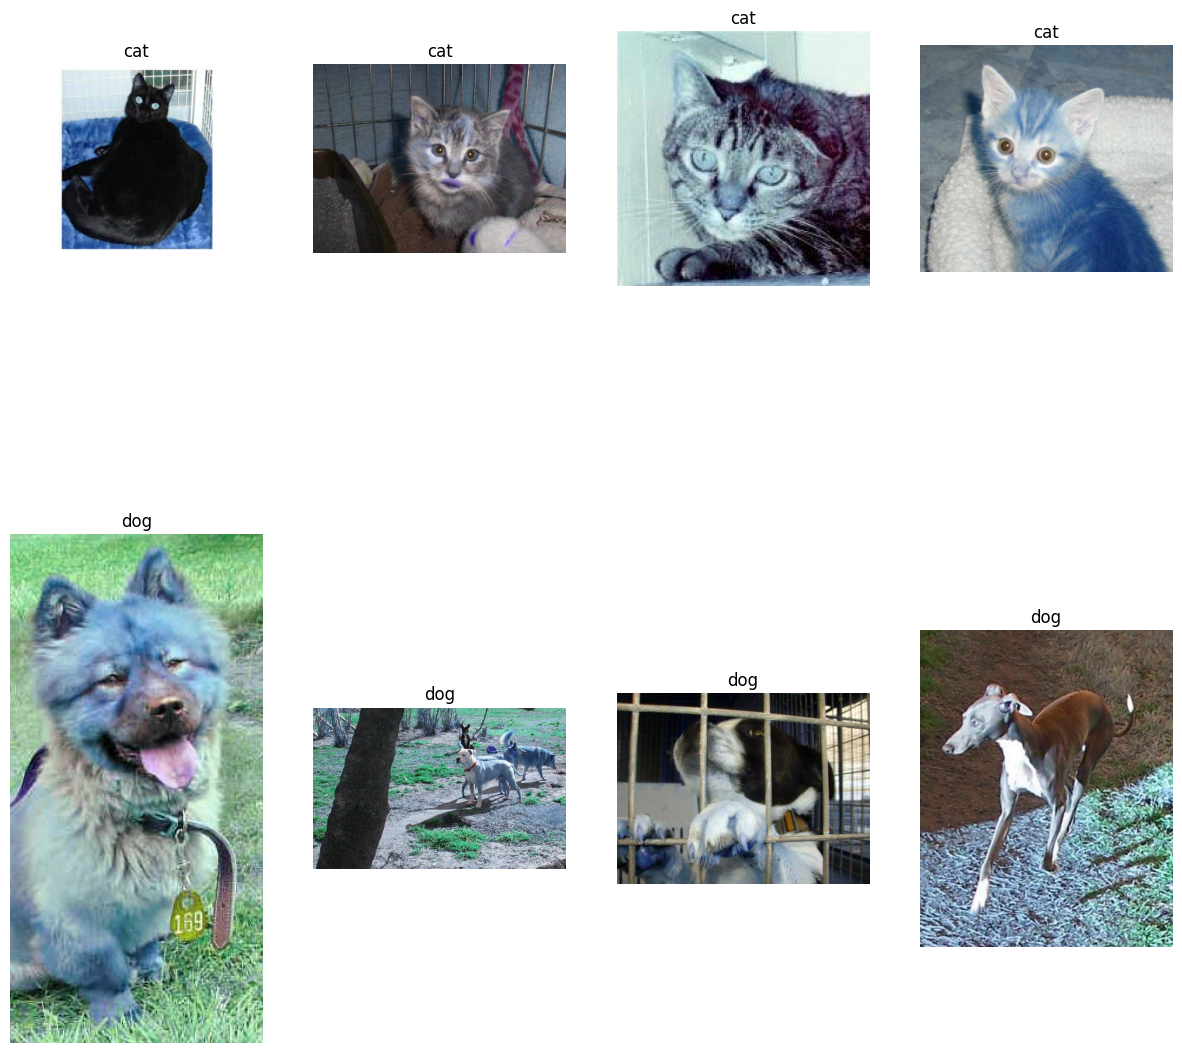

In [17]:
### show some data in each class
count = 0
plt.figure(figsize= (15,15))
for label in data_train.keys():
    for path in data_train[label]:
        sp = plt.subplot(2 , 4 , count+1)
        sp.set_title(label)
        image = cv2.imread(path)
        plt.axis('off')
        plt.imshow(image)
        count+=1
        if count % 4 == 0:
            break
plt.show()
    

# Split Train , Test , Validation

In [18]:

# # Path to train, test, and validation folders
# train_dir = '/kaggle/working/train_data'
# test_dir = '/kaggle/working/test_data'
# validation_dir = '/kaggle/working/validation_data'

# Dictionary data_train containing the addresses of the images in each class


# # Create the folders
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)
# os.makedirs(validation_dir, exist_ok=True)

# # Number of training, test, and validation data
# num_train = 10000
# num_test_validation = 2500


# # Copy dog images to the train , validation and test folder

  
# for i in range(len(data_train['dog'])+1):
#     if i < num_train:
#         shutil.copy(data_train['dog'][i], os.path.join(train_dir))
#     elif i < num_train + num_test_validation/2:
#         shutil.copy(data_train['dog'][i], os.path.join(validation_dir))
#     elif i < num_train + num_test_validation:
#         shutil.copy(data_train['dog'][i], os.path.join(test_dir))

# # Copy cat images to the train , validation and test folder
# for i in range(len(data_train['cat'])+1):
#     if i < num_train:
#         shutil.copy(data_train['cat'][i], os.path.join(train_dir))
#     elif i < num_train + num_test_validation/2:
#         shutil.copy(data_train['cat'][i], os.path.join(validation_dir))
#     elif i < num_train + num_test_validation:
#         shutil.copy(data_train['cat'][i], os.path.join(test_dir))

In [19]:
base_dir = '/kaggle/working/dogs_vs_cats'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir , 'train')
os.mkdir(train_dir) #make a new train directory inside my base directory

valid_dir= os.path.join(base_dir , 'validation')
os.mkdir(valid_dir) #make a new validation directory inside my base directory

test_dir = os.path.join(base_dir , 'test')
os.mkdir(test_dir) #make a new test directory inside my base directory

train_cats_dir = os.path.join(train_dir , 'cats')
os.mkdir(train_cats_dir) #make a new cats directory inside my train directory

train_dogs_dir = os.path.join(train_dir , 'dogs')
os.mkdir(train_dogs_dir) #make a new dogs directory inside my train directory

valid_cats_dir = os.path.join(valid_dir, 'cats')
os.mkdir(valid_cats_dir) #make a new cats directory inside my validation directory

valid_dogs_dir = os.path.join(valid_dir , 'dogs')
os.mkdir(valid_dogs_dir) #make a new dogs directory inside my validation directory

test_cats_dir = os.path.join(test_dir , 'cats')
os.mkdir(test_cats_dir) #make a new cats directory inside my test directory

test_dogs_dir = os.path.join(test_dir , 'dogs')
os.mkdir(test_dogs_dir) #make a new dogs directory inside my test directory

In [20]:
original_dataset_dir = '/kaggle/working/train'

fnames = ['cat.{}.jpg'.format(i) for i in range(10000)] #Move 10,000 cat images from the original dataset to the train cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(train_cats_dir , fname)
  shutil.move(src , dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,11250)] #Move 1250 cat images from the original dataset to the validation cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(valid_cats_dir , fname)
  shutil.move(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(11250,12500)] #Move 1250 cat images from the original dataset to the test cat directory
for fname in fnames:
  src= os.path.join(original_dataset_dir , fname)
  dst= os.path.join(test_cats_dir, fname)
  shutil.move(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000)] #Move 10,000 dog images from the original dataset to the train cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(train_dogs_dir ,fname)
  shutil.move(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,11250)] #Move 1250 dog images from the original dataset to the validation cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(valid_dogs_dir , fname)
  shutil.move(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(11250,12500)]#Move 1250 dog images from the original dataset to the test cat directory
for fname in fnames:
  src= os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir , fname)
  shutil.move(src, dst)

In [21]:
print(f'Total training cat images {len(os.listdir(train_cats_dir))}')
print(f'Total validation cat images {len(os.listdir(valid_cats_dir))}')
print(f'Total test cat images {len(os.listdir(test_cats_dir))}')
print('\n')
print(f'Total training dog images {len(os.listdir(train_dogs_dir))}')
print(f'Total validation cat images {len(os.listdir(valid_dogs_dir))}')
print(f'Total test cat images {len(os.listdir(test_dogs_dir))}')

Total training cat images 10000
Total validation cat images 1250
Total test cat images 1250


Total training dog images 10000
Total validation cat images 1250
Total test cat images 1250


# Data Augmentation using Filter

In [22]:
import random
from PIL import Image, ImageFilter, ImageDraw
import os

# Function to apply random filters to an image
def apply_random_filter(image):
    filter_type = random.choice(['Fog', 'Rain', 'Snow'])
    if filter_type == 'Fog':
        # Apply fog filter
        image = image.filter(ImageFilter.GaussianBlur(radius=5))
    elif filter_type == 'Rain':
        # Apply rain filter
        width, height = image.size
        draw = ImageDraw.Draw(image)
        raindrop_count = int(width * height * 0.01)  # Adjust the raindrop density as desired

        for _ in range(raindrop_count):
            x = random.randint(0, width)
            y = random.randint(0, height)
            length = random.randint(5, 15)
            draw.line([(x, y), (x, y + length)], fill=(200, 200, 200), width=1)

    elif filter_type == 'Snow':
        # Apply snow filter
        image = image.convert("RGBA")
        width, height = image.size
        snowflake_count = int(width * height * 0.01)  # Adjust the snowflake density as desired

        snowflake = Image.new('RGBA', (4, 4), (255, 255, 255, 255))

        for _ in range(snowflake_count):
            x = random.randint(0, width)
            y = random.randint(0, height)
            image.alpha_composite(snowflake, dest=(x, y))

    return image


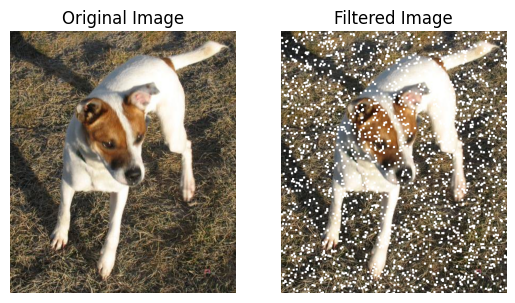

In [23]:
# apply filter on one sample
image = Image.open('/kaggle/working/dogs_vs_cats/train/dogs/dog.890.jpg')

# Apply the random filter
filtered_image = apply_random_filter(image)


plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.axis('off')

plt.show()

In [24]:
# Directory paths for cats and dogs images
train_cats_dir = '/kaggle/working/dogs_vs_cats/train/cats'
train_dogs_dir = '/kaggle/working/dogs_vs_cats/train/dogs'

# Number of images to apply filters and delete
num_images_to_filter = 5000

# Loop through the images in the train_cats_dir
cat_image_files = os.listdir(train_cats_dir)
random_cat_images = random.sample(cat_image_files, num_images_to_filter)

for fname in random_cat_images:
    image_path = os.path.join(train_cats_dir, fname)
    image = Image.open(image_path)
    image = apply_random_filter(image)
    image = image.convert("RGB")  # Convert the image to RGB mode
    image.save(image_path)


    
# Loop through the images in the train_dogs_dir
dog_image_files = os.listdir(train_dogs_dir)
random_dog_images = random.sample(dog_image_files, num_images_to_filter)

for fname in random_dog_images:
    image_path = os.path.join(train_dogs_dir, fname)
    image = Image.open(image_path)
    image = apply_random_filter(image)
    image = image.convert("RGB")  # Convert the image to RGB mode
    image.save(image_path)


In [25]:
train_cats_dir = '/kaggle/working/dogs_vs_cats/train/cats'
cat_image_files = os.listdir(train_cats_dir)
len(cat_image_files)

10000

# Model

In [26]:
import os
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [27]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [28]:
model_conv = InceptionV3(weights='imagenet', input_shape=(250, 250, 3), include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [29]:
model_conv.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [30]:
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.1,
    zoom_range=0.3,
)
generator = data_generator.flow_from_directory(
    '/kaggle/working/dogs_vs_cats/train',
    target_size=(250, 250),
    batch_size=20,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [31]:
data_generator_test = ImageDataGenerator(
    rescale=1.0/255.0,
)
generator_valid = data_generator_test.flow_from_directory(
    '/kaggle/working/dogs_vs_cats/validation',
    target_size=(250, 250),
    batch_size=10,
    class_mode='binary'
)

Found 2500 images belonging to 2 classes.


In [32]:
generator_test = data_generator_test.flow_from_directory(
    '/kaggle/working/dogs_vs_cats/test',
    target_size=(250, 250),
    batch_size=10,
    class_mode='binary'
)

Found 2500 images belonging to 2 classes.


In [33]:
from tensorflow.keras import models, layers, optimizers

In [34]:
model_conv.trainable = False

In [35]:
model = models.Sequential()
model.add(model_conv)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 40,677,665
Trainable params: 18,874,881
Non-trainable params: 21,802,784
_________________________________________________________________


In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', patience=7)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)
mch = ModelCheckpoint('model.h5', monitor='val_loss', mode='min', save_best_only=True)

# Train

In [38]:
history = model.fit(generator, steps_per_epoch=len(generator), epochs=500, validation_data=generator_valid, validation_steps=len(generator_valid), callbacks=[es, rlrop, mch])

Epoch 1/500
1000/1000 [==============================] - 351s 339ms/step - loss: 0.5669 - accuracy: 0.8808 - val_loss: 0.0330 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 2/500
1000/1000 [==============================] - 337s 337ms/step - loss: 0.2203 - accuracy: 0.8961 - val_loss: 0.0303 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 3/500
1000/1000 [==============================] - 331s 331ms/step - loss: 0.1925 - accuracy: 0.9046 - val_loss: 0.0356 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 4/500
1000/1000 [==============================] - 327s 327ms/step - loss: 0.1919 - accuracy: 0.9110 - val_loss: 0.0272 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 5/500
1000/1000 [==============================] - 327s 327ms/step - loss: 0.1880 - accuracy: 0.9147 - val_loss: 0.0281 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 6/500
1000/1000 [==============================] - 328s 328ms/step - loss: 0.1783 - accuracy: 0.9142 - val_loss: 0.0303 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 7/500
1000/1000 [=====

# Evaluate

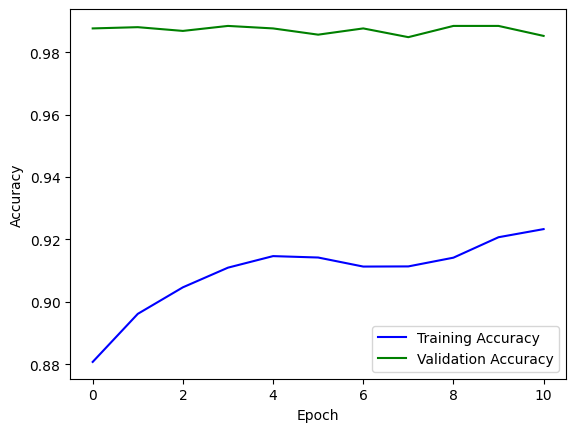

In [39]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.plot(history.history['accuracy'], color='blue', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color='green' , label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9883999824523926


# Predict

In [41]:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 40,677,665
Trainable params: 18,874,881
Non-trainable params: 21,802,784
_________________________________________________________________


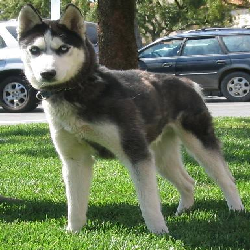

In [42]:
#predict one sample
import tensorflow.keras.utils as utils
img = utils.load_img(
    '/kaggle/working/dogs_vs_cats/test/dogs/dog.11369.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=(250, 250),
    interpolation='nearest',
    keep_aspect_ratio=False
)
img

In [43]:
img = utils.img_to_array(img)
img.shape

(250, 250, 3)

In [44]:
result = model.predict(tf.expand_dims(img, axis=0))
result

1/1 [==============================] - 2s 2s/step


array([[1.]], dtype=float32)

In [45]:
if float(result) < 0.5:
    print('Cat')
else:
    print('Dog')

Dog


# Test

In [46]:
model = load_model('/kaggle/working/model.h5')

In [47]:
model.evaluate(generator_test)

250/250 [==============================] - 8s 28ms/step - loss: 0.0338 - accuracy: 0.9900


[0.033848732709884644, 0.9900000095367432]

# Download Model

In [48]:
# import os
# import subprocess
# from IPython.display import FileLink, display

# def download_file(path, download_file_name):
#     os.chdir('/kaggle/working/')
#     zip_name = f"/kaggle/working/{download_file_name}.zip"
#     command = f"zip {zip_name} {path} -r"
#     result = subprocess.run(command, shell=True, capture_output=True, text=True)
#     if result.returncode != 0:
#         print("Unable to run zip command!")
#         print(result.stderr)
#         return
#     display(FileLink(f'{download_file_name}.zip'))

# download_file('/kaggle/working/model.h5', 'out')